In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
import torch
import wplotlib
import torch.nn as nn
from torch.autograd import Variable


 Weighted Regression<br>
	Each sample is weighted based on its likelihood to balance the data<br>
	<br>


In [4]:
 
data = wuml.wData(xpath='../../data/Chem_decimated_imputed.csv', batch_size=20, 
					label_type='continuous', label_column_name='finalga_best', 
					first_row_is_label=True, columns_to_ignore=['id'])

In [5]:
data = wuml.center_and_scale(data)

In [6]:
weights = wuml.wData(xpath='../../data/Chem_sample_weights.csv')
weights = weights.get_data_as('Tensor')

In [7]:
def costFunction(x, y, ŷ, ind):
	relu = nn.ReLU()
#
	W = torch.squeeze(weights[ind])
	n = len(ind)
	ŷ = torch.squeeze(ŷ)
	y = torch.squeeze(y)
#
	penalty = torch.sum(relu(W*(ŷ - y)))/n	# This will penalize predictions higher than true labels
	loss = torch.sum(W*((y - ŷ)**2))/n + 0.8*penalty
	return loss

In [8]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(200,'relu'),(200,'relu'),(200,'relu'),(1,'none')], max_epoch=6000, learning_rate=0.001)
bNet.train()

	epoch: 6000, Avg Loss: 0.3990, Learning Rate: 0.00000098

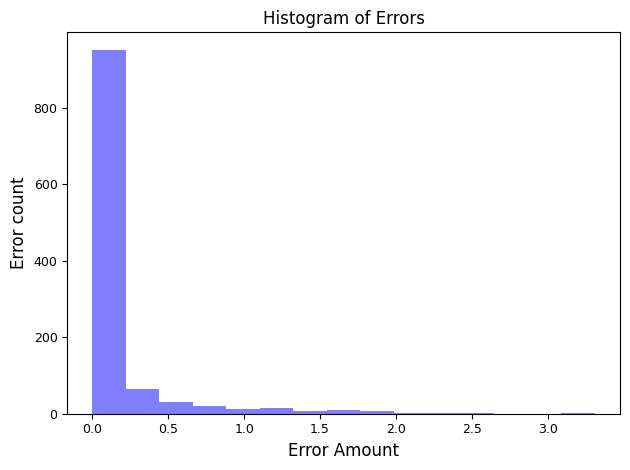

,y,ŷ,Δy
0,33.86,33.849998,1.000153e-02
1,37.43,37.419998,1.000183e-02
2,39.57,39.369999,2.000011e-01
3,38.86,38.849998,1.000153e-02
4,37.29,37.279999,1.000122e-02
5,38.86,38.849998,1.000153e-02
6,39.00,38.930000,6.999969e-02
7,39.71,39.709999,9.155273e-07
8,36.57,36.529999,4.000122e-02
9,35.00,34.990002,9.998322e-03


,y,ŷ,Δy
0,33.86,33.849998,0.010002
1,37.43,37.419998,0.010002
2,39.57,39.369999,0.200001
3,38.86,38.849998,0.010002
4,37.29,37.279999,0.010001
...,...,...,...
1117,37.14,37.270000,0.130000
1118,38.57,37.040001,1.529999
1119,38.14,38.220001,0.080001
1120,40.29,40.279999,0.010001


In [9]:
Ŷ = bNet(data, output_type='ndarray')
output = wuml.output_regression_result(data.Y, Ŷ)
wuml.jupyter_print(output)